First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

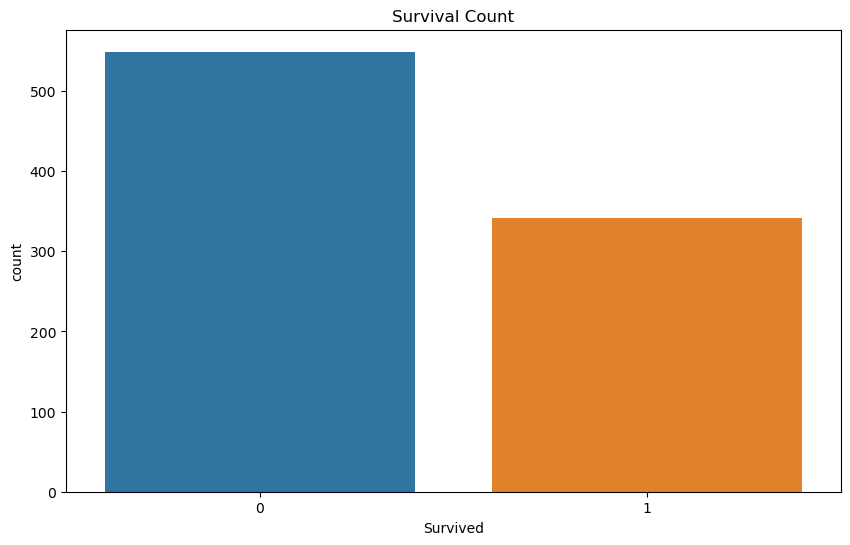

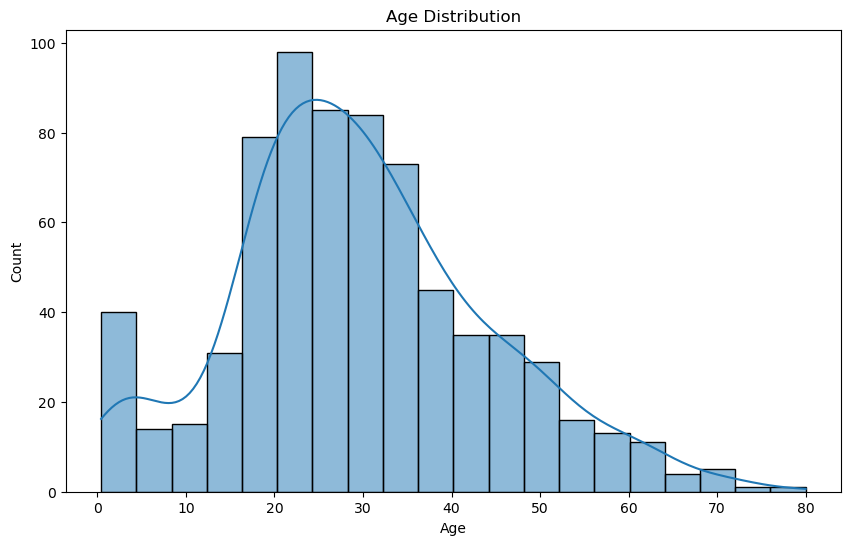


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Preprocessed Data Shape:
Training: (712, 9) Test: (179, 9)


In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load Dataset (Example: Titanic Dataset)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Data Exploration
print("First 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe(include='all'))

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Check Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Data Preprocessing
# Drop unnecessary columns
data_clean = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
imputer_age = SimpleImputer(strategy='median')
data_clean['Age'] = imputer_age.fit_transform(data_clean[['Age']])

imputer_embarked = SimpleImputer(strategy='most_frequent')
data_clean['Embarked'] = imputer_embarked.fit_transform(data_clean[['Embarked']]).ravel()  # Fix applied here

# Encode categorical variables
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

data_encoded = preprocessor.fit_transform(data_clean)

# Convert to DataFrame for clarity
encoded_features = preprocessor.get_feature_names_out()
data_encoded = pd.DataFrame(data_encoded, columns=encoded_features)

# Add 'Survived' back to the dataset
data_encoded['Survived'] = data_clean['Survived'].values

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=['Survived'])
y = data_encoded['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nPreprocessed Data Shape:")
print("Training:", X_train.shape, "Test:", X_test.shape)


# Assistant
The error occurs because the required libraries are not imported at the beginning of the code. This is a common setup error in Jupyter notebooks.

Would you like me to provide the corrected code with all necessary imports?

After your confirmation, I'll provide a version with all the required library imports for:
- pandas (pd)
- numpy (np)
- matplotlib.pyplot (plt)
- seaborn (sns)
- sklearn components (SimpleImputer, OneHotEncoder, StandardScaler, train_test_split, ColumnTransformer)